# Разложение матриц

## Сингулярное разложение (SVD)

![original image](https://cdn.mathpix.com/snip/images/hT4mrYdCdSarZLNfsyODsPifVaxqorpPD2r530AsbFU.original.fullsize.png)



- $r=\operatorname{rank}(A)$
  
- $U, V$ - унитарные ($U^{*}U=E$)
  
- $\sigma_1 \geq \ldots \geq \sigma_r>0$ - ненулевые _сингулярные_ числа. Для эрмитовых матриц равны модулям собственных чисел.

- Столбцы $U, V$ - _сингулярные_ вектора.

- Существует всегда.
  
Note: SVD также может быть определена для  $U \in \mathbb{C}^{m \times p}$, $\Sigma \in \mathbb{R}^{p \times p}$ и $V \in \mathbb{C}^{n \times p}, p=\min \{n . m\}$

### Алгоритмы построения

- Спектральное разложение $A A^*$ или $A^* A$ совпадает со спектральным разложением (собственное разложение).

- Стабильный алгоритм $\mathcal{O}\left(m n^2\right)$ , $(m>n):$
1. Bidiagonalize $A$ by Householder reflections
   
$$
A=U_1 B V_1^*
$$

2. Find SVD of $B=U_2 \Sigma V_2^*$ by spectral decomposition of $T$ ( 2 options).

3. $U=U_1 U_2, \quad V=V_1 V_2$

### Области применения

- Сжатие данных

- Эффективное вычисление псевдообратной матрицы

- Определение ключевых признаков в Data Science

## Спектральное разложение

![original image](https://cdn.mathpix.com/snip/images/wHlmYBemge8HfuQqISNBZMEiL0K4KGhjAILp6tJ-csU.original.fullsize.png)


- $\lambda_1, \ldots, \lambda_n$ - собственные числа.
  
- Столбцы $S$ - собственные вектора.

- Не всегда существует (в отличие от верхнетреугольного вида)

### Алгоритмы построения

- Если $A=A^*$, Jacobi method: $\mathcal{O}\left(n^3\right)$

- Если $A A^*=A^* A$, QR algorithm: $\mathcal{O}\left(n^3\right)$

- Если $A A^* \neq A^* A$ ассимптотика также $\mathcal{O}\left(n^3\right)$ 

### Области применения

- Полное спектральное разложение используется редко, т.к. для вычисления необходимы все собственные вектора.

- Для вычисления собственных чисел лучше использовать верхнетреугольную форму (существует алгоритм за  $\mathcal{O}\left(n^3\right)$)

## LU-разложение

![original image](https://cdn.mathpix.com/snip/images/gRXBxyUaz9_3aO5NcA6Hc459tjNNNX70N_g20c8pZBw.original.fullsize.png)



- Существует только при ненулевых лидирующих минорах.

- Уникально.

### Алгоритмы построения

- Different versions of Gaussian elimination, $\mathcal{O}\left(n^3\right)$ flops. In LU for stability use permutation of rows or columns (LUP).

- $\mathcal{O}\left(n^3\right)$ can be decreased for sparse matrices by appropriate permutations, e.g.
  - minimum degree ordering
  - Cuthill-Mckee algorithm

- Banded matrix with bandwidth $b$

  ![original image](https://cdn.mathpix.com/snip/images/dsH46H6rFYZetCeAC_syK3GulV7oTBY9lhuWFw6SbzQ.original.fullsize.png)

can be decomposed using $\mathcal{O}\left(n b^2\right)$ flops.

### Области применения

LU и более высокоуровневые модификации LDL, Холецкий используются для 

- Решения СЛАУ. Пусть $A=L U$, тогда сложность решения $A x=b$ есть $\mathcal{O}\left(n^2\right)$ :

  1. Решим простую систему: $L y=b$
  
  2. Решим обратную систему: $U x=y$


- Обращения матриц 

- Вычисления детерминанта
  
- Как часть других разложений.

## Разложение Холецкого

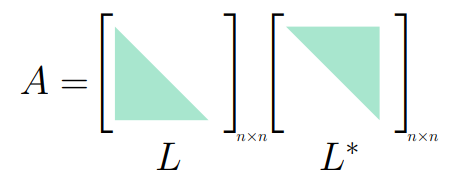

- Существует для симметричных положительно-определённых матриц $A$

- Более устойчив, чем LU

### Алгоритмы построения

Аналогичны LU.

### Области применения

- Метода наименьших квадратов. 

- Численное решение дифференциальных уравнений.


## Задача 1 - решить СЛАУ с помощью LU-разложения

Пусть СЛАУ:

$$
Ax=b
$$

Тогда хотим:

$$
Ax = LUx = b
$$

Для чего последовательно решаем:

$$
Ly=b
$$

$$
Ux=y
$$

Воспользуемся алгоритмом из https://ru.wikipedia.org/wiki/LU-%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5

Будем использовать следующие обозначения для элементов матриц: $A=\left(a_{i j}\right), L=\left(l_{i j}\right), U=\left(u_{i j}\right), i, j=1 \ldots n$; причём диагональные элементы матрицы $L: l_{i i}=1, i=1 \ldots n$.

Найти матрицы $L$ и $U$ можно следующим образом (выполнять шаги следует строго по порядку, так как следующие элементы находятся с использованием предыдущих):

1. Цикл і от 1 до n
    1. Цикл ј от 1 до n
        1. $\mathrm{u}_{\mathrm{ij}}=0, \mathrm{l}_{\mathrm{ij}}=0$
        2. $l_{\mathrm{ii}}=1$
2. Цикл і от 1 до n
    1. Цикл ј от 1 до n
        1. Если $\mathrm{i}<=\mathrm{j}: u_{i j}=a_{i j}-\sum_{k=1}^{i-1} l_{i k} * u_{k j}$
        2. Если $\mathrm{i}>\mathrm{j}: l_{i j}=\left(a_{i j}-\sum_{k=1}^{j-1} l_{i k} * u_{k j}\right) / u_{j j}$

В итоге мы получим матрицы - $L$ и $U$.

In [48]:
import numpy as np

A = np.random.choice([1,2,3,4,5,6.], size = (5, 5))
b = np.random.choice([1,2,3,4,5,6.], size=(5, 1))

# LU разложение

L = np.zeros((5,5))
U = np.zeros((5,5))

# Первый цикл

for i in range(5):
    L[i, i] = 1
    
# Второй цикл

for i in range(5):
    for j in range(5):
        if (i <= j):
            U[i, j] = A[i, j] - L[i, :i] @ U[:i, j]
        else:
            L[i, j] = (A[i, j] - L[i, :j] @ U[:j, j])/U[j, j]
            
print("L =")
print(L)
print("U =")
print(U)

L =
[[  1.           0.           0.           0.           0.        ]
 [  0.4          1.           0.           0.           0.        ]
 [  1.           1.42857143   1.           0.           0.        ]
 [  0.8         -1.57142857   0.16         1.           0.        ]
 [  1.2         -1.28571429   0.08       -12.           1.        ]]
U =
[[ 5.          4.          4.          6.          4.        ]
 [ 0.          1.4         0.4        -0.4         2.4       ]
 [ 0.          0.         -3.57142857 -4.42857143 -4.42857143]
 [ 0.          0.          0.          0.28        3.28      ]
 [ 0.          0.          0.          0.         41.        ]]


In [49]:
A - L@U

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.88178420e-16,  0.00000000e+00]])

In [53]:
# Ly = b

y = b*0

for i in range(L.shape[0]):
    y[i] = b[i] - L[i, :i] @ y[:i]
    
# Ux = y

x = b*0

for i in range(U.shape[0]-1, -1, -1):
    x[i] = (y[i] - U[i, i+1:] @ x[i+1:])/U[i, i]
    

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
